# Самостоятельный проект

К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
* Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
* Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
1. средний удой за год — не менее 6000 килограммов;
2. молоко должно быть вкусным.

**Описание данных**

У вас три датасета: ferma_main.csv, ferma_dad.csv, cow_buy.csv.

1. Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. 

Описание данных:

* id — уникальный идентификатор коровы.
* Удой, кг — масса молока, которую корова даёт в год (в килограммах).
* ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
* Сырой протеин, г — содержание сырого протеина в корме (в граммах).
* СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Жирность,% — содержание жиров в молоке (в процентах).
* Белок,% — содержание белков в молоке (в процентах).
* Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете ferma_main.csv можно разделить на группы.

* Характеристики коровы: id, Порода, порода папы_быка, Возраст.

* Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).

* Характеристика пастбища: Тип пастбища.

* Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

2. Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. 

Описание даннх: 

* id — уникальный идентификатор коровы.
* Имя Папы — имя папы коровы.

3. Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.

Описание данных: 
* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Имя_папы — имя папы коровы.
* Текущая_жирность,% — содержание жиров в молоке (в процентах).
* Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

**Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.**

* Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
* Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
* Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

**План работы:**
1. Загрузка данных.
2. Предобработка данных.
3. Иследовательский анализ данных.
4. Корреляционный анализ данных.
5. Задача регрессии: 
* Построение первой модели линейной регрессии.
* Построение второй модели линейной регрессии с исключением нелинейности.
* Построение третьей модели линейной регрессии с признаком "Имя Папы" из датасета ferma_dad.csv.
* Расчет точности каждой модели по трем метрикам: MSE, MAE, RMSE.
* Рассчет доверительного интревала.
* Построение прогноза удоев коров.

6. Задача классификации.
7. Вывод.

## Загрузка данных

In [151]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import scipy.stats as st
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            mean_absolute_error, mean_squared_error,
                            precision_score,
                            recall_score,
                            r2_score)
from sklearn.preprocessing import OneHotEncoder, StandardScaler

Посмотрим на первый датасет.

In [152]:
try:
    df1 = pd.read_csv(r'~/ferma_main.csv', sep=';')
except:
    print('Something is wrong')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
5,6,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет
6,7,5910,"13,2",1792,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,48","3,077",вкусно,более_2_лет
7,8,6179,"14,7",1806,"0,93",Вис Бик Айдиал,Равнинные,Айдиал,"3,55","3,076",вкусно,более_2_лет
8,9,6783,"14,2",1918,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,077",вкусно,более_2_лет
9,10,5339,"13,4",1791,"0,895",Вис Бик Айдиал,Холмистое,Соверин,"3,13","3,075",вкусно,менее_2_лет


,id,"Удой, кг","Сырой протеин, г"
count,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,1922.682965
std,183.096982,1638.401021,182.392548
min,1.000000,5204.000000,1660.000000
25%,159.250000,5751.750000,1772.250000
50%,317.500000,6130.500000,1880.500000
75%,475.750000,6501.000000,2058.750000
max,629.000000,45616.000000,2349.000000


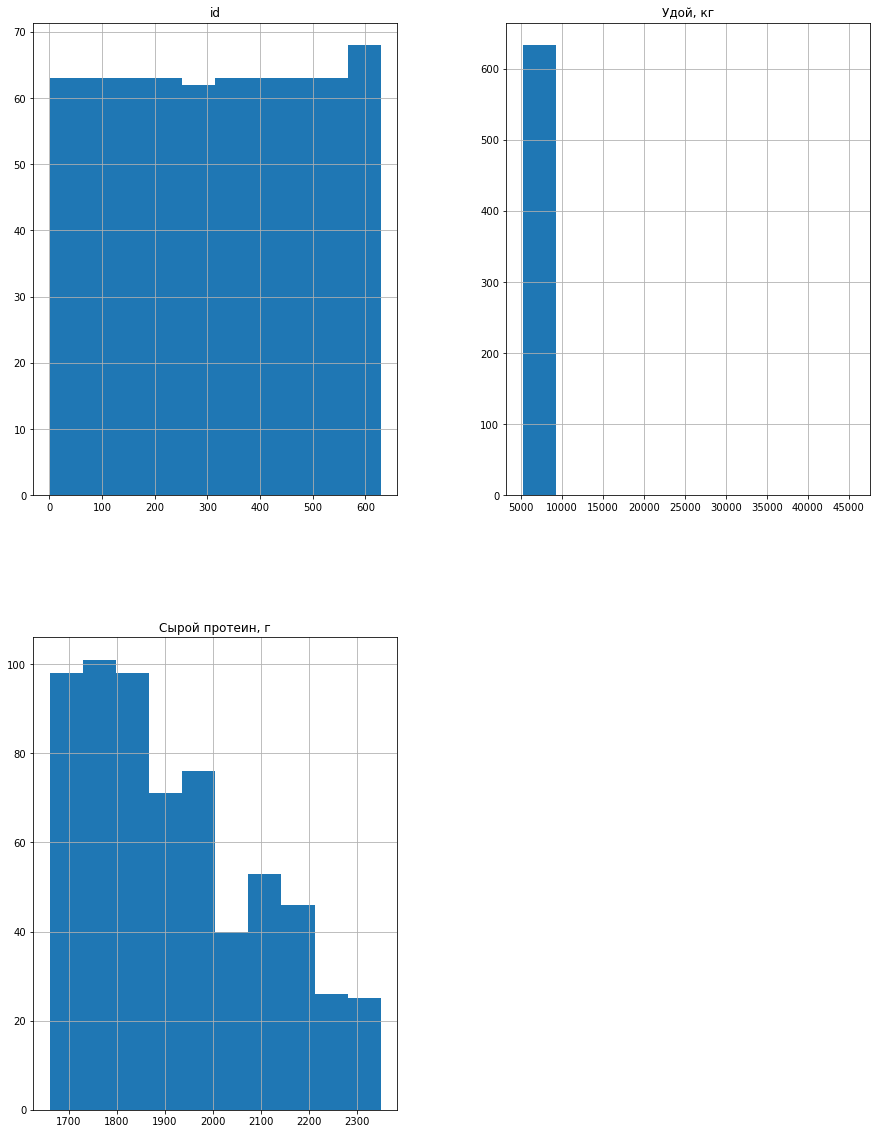

In [153]:
df1.info()
display(df1.head(10))
print()
display(df1.describe())
df1.hist(figsize = (15, 20));

Пропущенных значений не замечено. Тип данных нужно поменять у ЭКЕ (Энергетическая кормовая единица), СПО (Сахаро-протеиновое соотношение), Жирность,%, Белок,% на количественный тип.

Взглянем на второй:

In [154]:
try:
    df2 = pd.read_csv(r'~/ferma_dad.csv', sep=';')
except:
    print('Something is wrong')

In [155]:
df2.info()
display(df2.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


Пропущенных значений не замечено. Тип данных нужно поменять не нужно.

Взглянем на третий: 

In [156]:
try:
    df3 = pd.read_csv(r'~/cow_buy.csv', sep=';')
except:
    print('Something is wrong')

In [157]:
df3.info()
display(df3.head(10))
print()
display(df3.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
count,20,20,20,20,20,20,20
unique,2,2,2,4,12,12,2
top,РефлешнСоверинг,равнинное,Соверин,Буйный,"3,59","3,074",более_2_лет
freq,11,11,12,8,3,5,15


Пропущенных значений не замечено. Тип данных нужно поменять у Текущая_жирность,%; Текущий_уровень_белок,% на количественный тип.

**Вывод:** в целом, данные соответствуют заявленным характеристикам.

##  Предобработка данных

Приведем к нижнему регистру столбцы датасетов.

In [158]:
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()
df3.columns = df3.columns.str.lower()

Преобразуем к нужному типу данных.

In [159]:
def type_col(data, columns):
    data[columns] = data[columns].str.replace(',', '.').astype('float64') 
    return data[columns]

In [160]:
type_col(df1, 'эке (энергетическая кормовая единица)')
type_col(df1, 'спо (сахаро-протеиновое соотношение)')
type_col(df1, 'жирность,%')
type_col(df1, 'белок,%')

type_col(df3, 'текущий_уровень_белок,%')
type_col(df3, 'текущая_жирность,%')

0     3.58
1     3.54
2     3.59
3     3.40
4     3.64
5     3.63
6     3.58
7     3.57
8     3.59
9     3.40
10    3.73
11    3.73
12    3.68
13    3.42
14    3.59
15    3.40
16    3.73
17    3.77
18    3.34
19    3.64
Name: текущая_жирность,%, dtype: float64

In [161]:
df1.rename(columns = {
    'эке (энергетическая кормовая единица)': 'эке', 
    'спо (сахаро-протеиновое соотношение)': 'спо',
    'порода папы_быка': 'порода папы'}, 
    inplace=True
          )

In [162]:
df3.rename(columns = {
    'имя_папы': 'имя папы',
    'текущая_жирность,%': 'текущая жирность,%', 
    'текущий_уровень_белок,%': 'текущий уровень белка,%',
    'порода папы_быка': 'порода папы'}, 
    inplace=True
          )

Проверим на дубликаты.

In [163]:
print(df1['тип пастбища'].unique())
print(df3['тип пастбища'].unique())

['Равнинное' 'Равнинные' 'Холмистое']
['холмистое' 'равнинное']


In [164]:
df1['тип пастбища'] = df1['тип пастбища'].replace('Равнинные', 'равнинное')
df1['тип пастбища'] = df1['тип пастбища'].replace('Равнинное', 'равнинное')
df1['тип пастбища'] = df1['тип пастбища'].replace('Холмистое', 'холмистое')
df1['тип пастбища'].unique()

array(['равнинное', 'холмистое'], dtype=object)

In [165]:
print(df1['порода'].value_counts())
df3['порода'].value_counts()

Вис Бик Айдиал     373
РефлешнСоверинг    261
Name: порода, dtype: int64


РефлешнСоверинг    11
Вис Бик Айдиал      9
Name: порода, dtype: int64

In [166]:
print(df1['порода папы'].value_counts())
df3['порода папы'].value_counts()

Соверин    316
Айдиал     240
Айдиалл     78
Name: порода папы, dtype: int64


Соверин    12
Айдиал      8
Name: порода папы, dtype: int64

In [167]:
df1['порода'] = df1['порода'].replace('Вис Бик Айдиал', 'Айдиал')
df1['порода'] = df1['порода'].replace('РефлешнСоверинг', 'Соверинг')
df1['порода папы'] = df1['порода папы'].replace('Соверин', 'Соверинг')
df1['порода папы'] = df1['порода папы'].replace('Айдиалл', 'Айдиал')

In [168]:
df3['порода'] = df3['порода'].replace('Вис Бик Айдиал', 'Айдиал')
df3['порода'] = df3['порода'].replace('РефлешнСоверинг', 'Соверинг')
df3['порода папы'] = df3['порода папы'].replace('Соверин', 'Соверинг')

In [169]:
print(df1.duplicated().sum())
print(df2.duplicated().sum())
print(df3.duplicated().sum())

5
0
4


In [170]:
df1[df1.duplicated()]

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы,"жирность,%","белок,%",вкус молока,возраст
629,627,5970,14.4,1837,0.88,Соверинг,холмистое,Соверинг,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,Соверинг,холмистое,Соверинг,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,Соверинг,холмистое,Соверинг,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,Соверинг,холмистое,Соверинг,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,Соверинг,холмистое,Соверинг,3.64,3.075,не вкусно,более_2_лет


In [171]:
df3[df3.duplicated()]

,порода,тип пастбища,порода папы,имя папы,"текущая жирность,%","текущий уровень белка,%",возраст
6,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет
14,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет
19,Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [172]:
df3.head(10)

,порода,тип пастбища,порода папы,имя папы,"текущая жирность,%","текущий уровень белка,%",возраст
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Айдиал,равнинное,Соверинг,Буйный,3.54,3.081,менее_2_лет
2,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет
3,Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,Соверинг,равнинное,Соверинг,Геркулес,3.63,3.053,менее_2_лет
6,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Айдиал,равнинное,Соверинг,Буйный,3.57,3.079,более_2_лет
8,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет
9,Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


Как мы видим, то 4 строки показываются, как дубликаты, но пока не будем их удалять.

In [173]:
df1 = df1.drop_duplicates(keep='first').reset_index(drop=True)
df2 = df2.drop_duplicates(keep='first').reset_index(drop=True)
#df3 = df3.drop_duplicates(keep='first').reset_index(drop=True)

print(df1.duplicated().sum())
print(df2.duplicated().sum())
print(df3.duplicated().sum())

0
0
4


Посмотрим на пропуски.

In [174]:
print(df1.isna().sum())
print()
print(df2.isna().sum())
print()
print(df3.isna().sum())

id                  0
удой, кг            0
эке                 0
сырой протеин, г    0
спо                 0
порода              0
тип пастбища        0
порода папы         0
жирность,%          0
белок,%             0
вкус молока         0
возраст             0
dtype: int64

id          0
имя папы    0
dtype: int64

порода                     0
тип пастбища               0
порода папы                0
имя папы                   0
текущая жирность,%         0
текущий уровень белка,%    0
возраст                    0
dtype: int64


In [175]:
print(df1.info())
print()
print(df2.info())
print()
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой, кг          629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой протеин, г  629 non-null    int64  
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип пастбища      629 non-null    object 
 7   порода папы       629 non-null    object 
 8   жирность,%        629 non-null    float64
 9   белок,%           629 non-null    float64
 10  вкус молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    -----------

**Вывод**: мы обработали дубликаты, проверили на наличие пропусков, изменили тип данных, где это необходимо.

## Исследовательский анализ данных

Построим функции для визуализации данных

In [176]:
#распределение и диаграмма размаха для количественных признаков
def hist_box(df, feature, title):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
    fig.suptitle(f"{title}", fontsize=16)
    sns.histplot(df[feature], kde=True, bins=20, ax=ax[0])
    ax[0].set_title('Histogram', fontsize=15)
    
    sns.boxplot(df[feature], ax=ax[1])
    ax[1].set_title('Boxplot', fontsize=15)
    plt.show()

In [177]:
#столбчатая диаграмма распределения для категориальных данных
def bar_plot(data, feature, title, xticks=None, xlabel=None):
    fig = plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=data[feature].value_counts().index,
                     y=data[feature].value_counts())
    if xticks:
        ax.set(xticklabels=xticks)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel)
    plt.ylabel('Количество')
    plt.show()

**Статистический анализ количественных признаков**

In [178]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
"удой, кг",629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
эке,629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
"сырой протеин, г",629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
спо,629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
"жирность,%",629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
"белок,%",629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


В столбце "удой, кг" видно, что максимальное значение 45616, при этом 3 квартиль  равен 6501. Возьмем этот нюанс на заметку. 

In [179]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
"текущая жирность,%",20.0,3.5775,0.126818,3.340,3.510,3.590,3.650,3.770
"текущий уровень белка,%",20.0,3.0695,0.010339,3.046,3.064,3.074,3.076,3.081


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


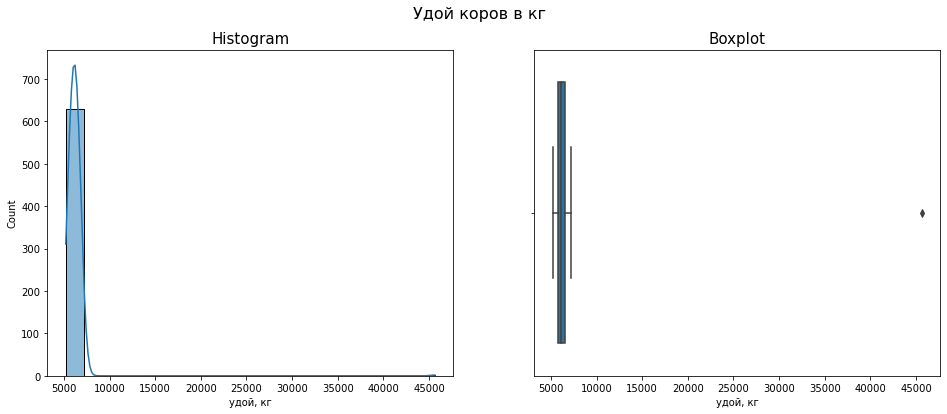

In [180]:
hist_box(df1, 'удой, кг', 'Удой коров в кг')

In [181]:
df1[df1['удой, кг'] > 45000]

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы,"жирность,%","белок,%",вкус молока,возраст
16,17,45616,11.5,1675,0.93,Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


Все-таки это оказалось одним артефактом. В таком случае, избавимся от него. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


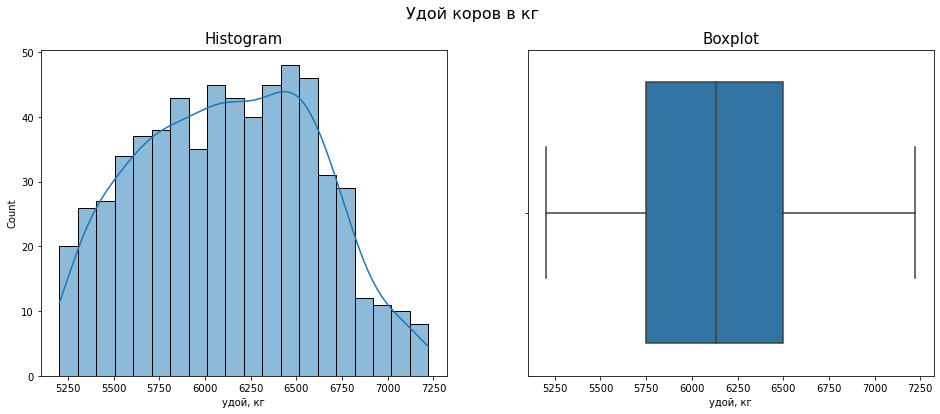

In [182]:
df1 = df1.loc[df1['удой, кг'] < 10000]
hist_box(df1, 'удой, кг', 'Удой коров в кг')

Значения сосредоточены, в основном, в пределах 5.2 до 7.3 тысяч. Распределение в какой-то степени похоже на нормальное, но с асимметрией.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


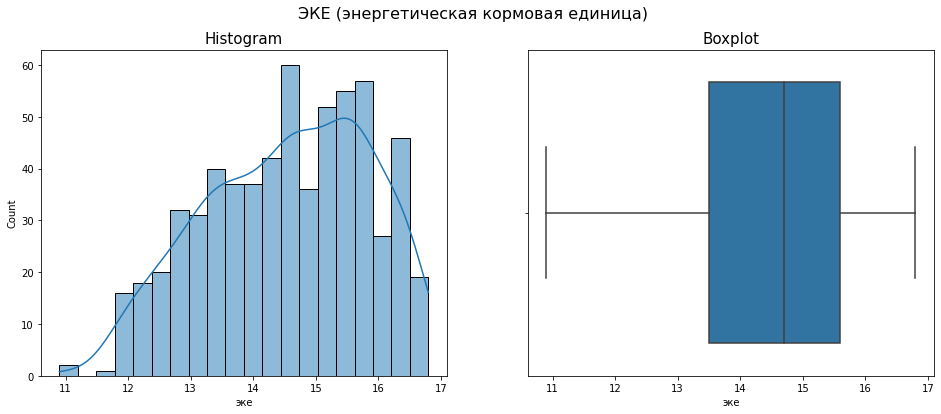

In [183]:
hist_box(df1, 'эке', 'ЭКЕ (энергетическая кормовая единица)')

Распределение нормальное, с асимметрией вправую сторону. Выбросов не замечено.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


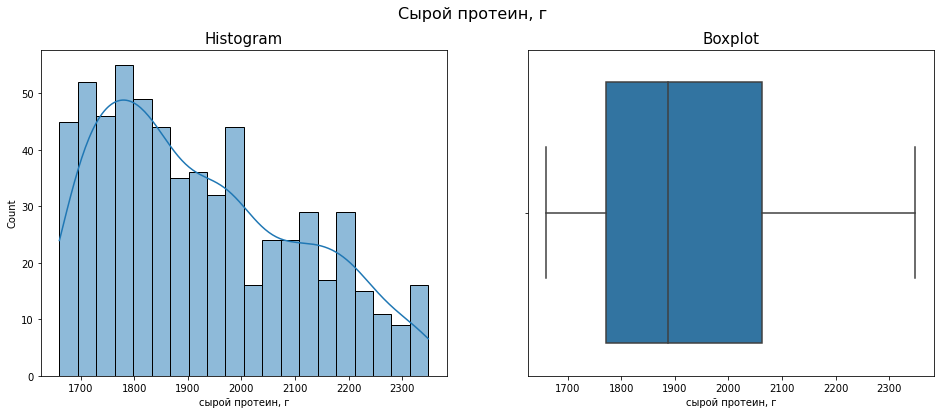

In [184]:
hist_box(df1, 'сырой протеин, г', 'Сырой протеин, г')

Распределение нормальное, с асимметрией влевую сторону. Выбросов не замечено.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


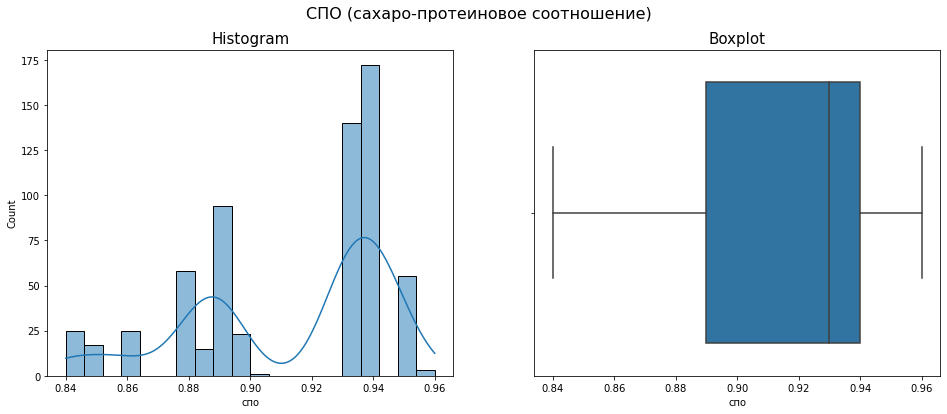

In [185]:
hist_box(df1, 'спо', 'СПО (сахаро-протеиновое соотношение)')

Распределение нормальное, с несколькими вершинами. Выбросов не замечено.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


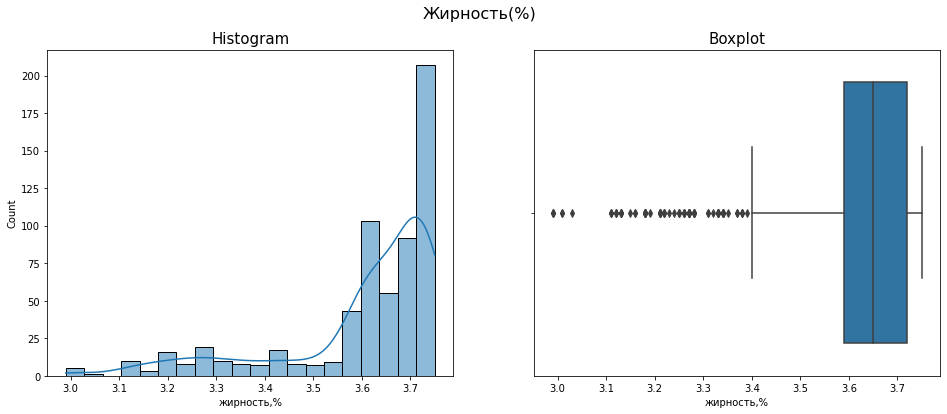

In [186]:
hist_box(df1, 'жирность,%', 'Жирность(%)')

Распределение нормальное, асимметричное. Имеет множество выбросов ниже первой квартили.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


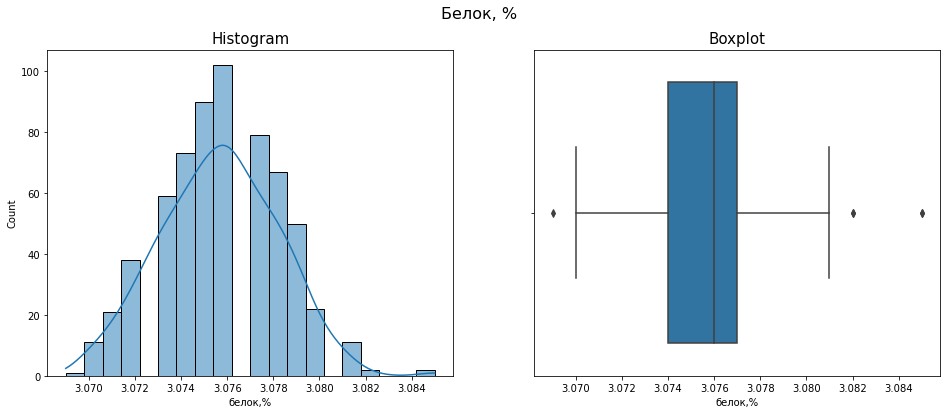

In [187]:
hist_box(df1, 'белок,%', 'Белок, %')

 Распределение выглядит, как нормальное. Имеет несколько выбросов.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


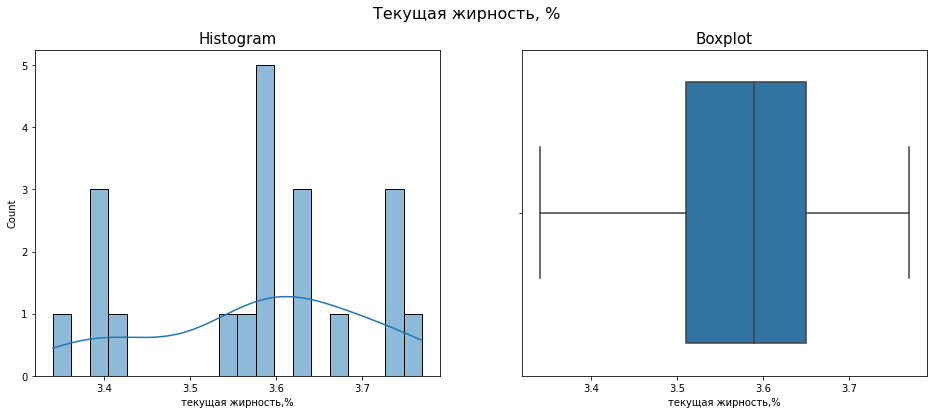

In [188]:
hist_box(df3, 'текущая жирность,%', 'Текущая жирность, %')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


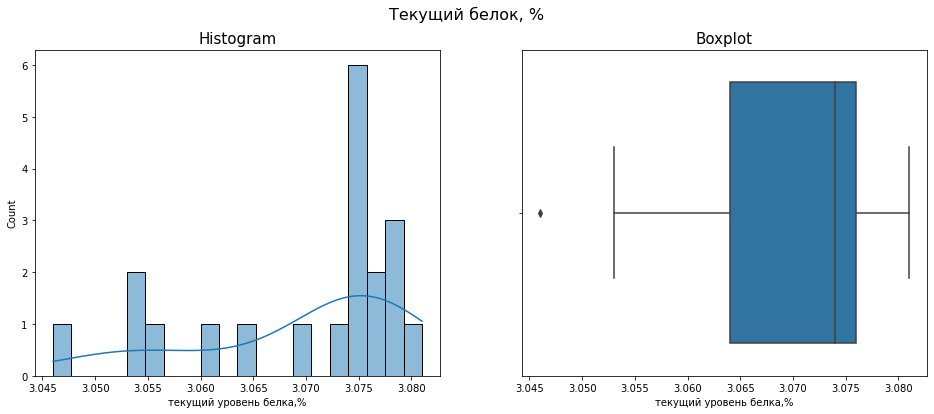

In [189]:
hist_box(df3, 'текущий уровень белка,%', 'Текущий белок, %')

Для оценки характеристик из датасета cow_buy.csv (df3) недостаточно данных.

**Статистический анализ для категориальных признаков**

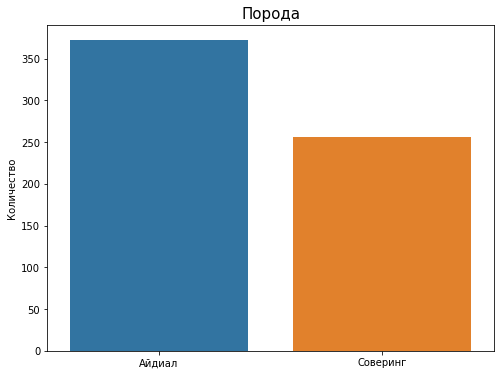

In [190]:
bar_plot(df1, 'порода', 'Порода')

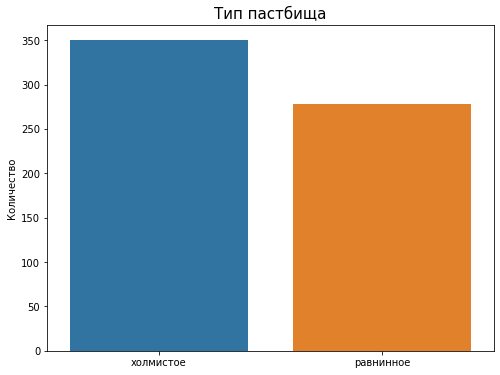

In [191]:
bar_plot(df1, 'тип пастбища', 'Тип пастбища')

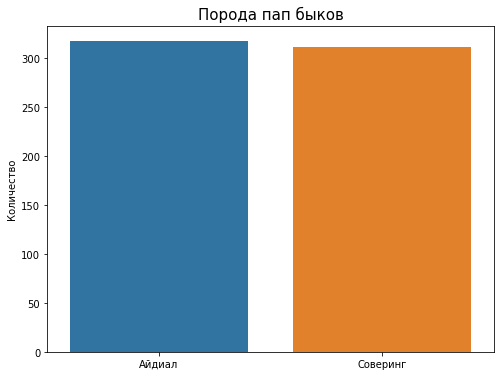

In [192]:
bar_plot(df1, 'порода папы', 'Порода пап быков')

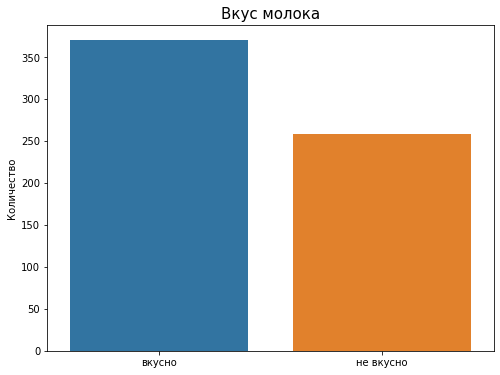

In [193]:
bar_plot(df1, 'вкус молока', 'Вкус молока')

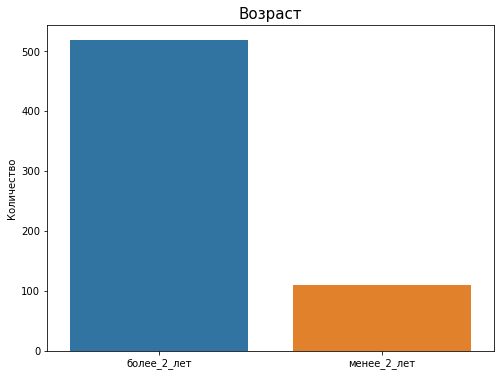

In [194]:
bar_plot(df1, 'возраст', 'Возраст')

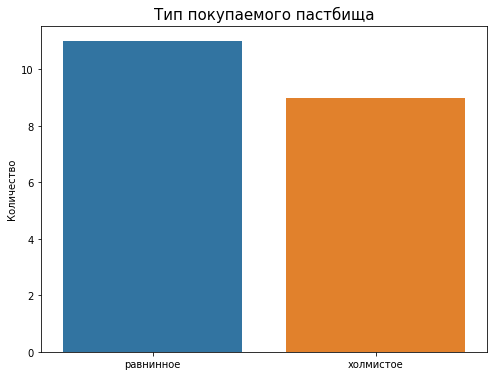

In [195]:
bar_plot(df3, 'тип пастбища', 'Тип покупаемого пастбища')

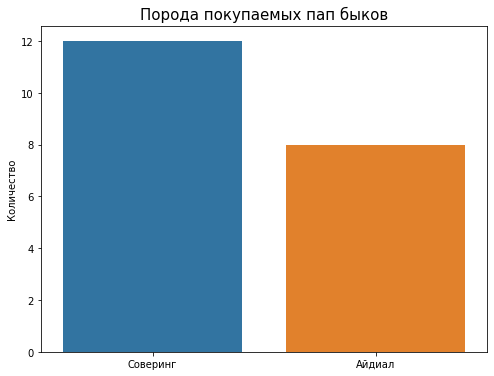

In [196]:
bar_plot(df3, 'порода папы', 'Порода покупаемых пап быков')

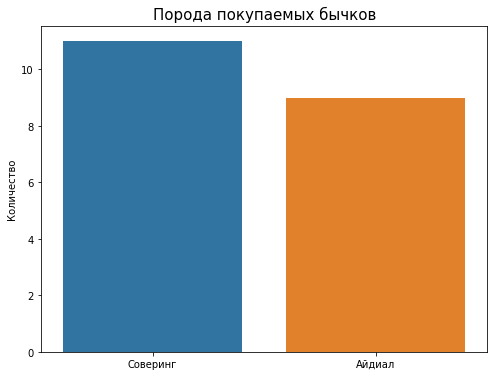

In [197]:
bar_plot(df3, 'порода', 'Порода покупаемых бычков')

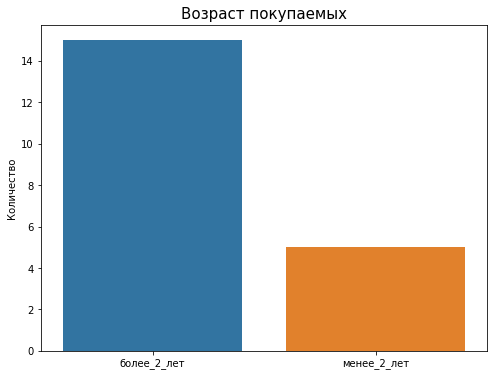

In [198]:
bar_plot(df3, 'возраст', 'Возраст покупаемых')

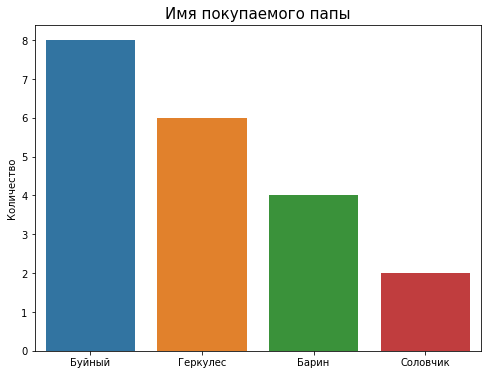

In [199]:
bar_plot(df3, 'имя папы', 'Имя покупаемого папы')

**Вывод:**
1. Количественные признаки: 
* признак "удой, кг" датафрейма ferma_main (df1) имел значительный выброс ~45 тонн молока, распределение асимметричное;
* признак "эке (энергетическая кормовая единица)" датафрейма ferma_main (df1) распределение нормальное, с асимметрией вправую сторону, выбросов не замечено;
* признак "сырой протеин, г" датафрейма ferma_main (df1) распределение нормальное, с асимметрией влевую сторону, выбросов не замечено;
* признак "спо (сахаро-протеиновое соотношение)" датафрейма ferma_main (df1) распределение нормальное, с несколькими вершинами, выбросов не замечено;
* признак "жирность, %" датафрейма ferma_main (df1) имеет множество выбросов ниже первой квартили, распределение асимметричное;
* признак "белок, %" датафрейма ferma_main (df1) имеет несколько выбросов, при этом распределение выглядит, как нормальное;
* признак "текущая жирность, %" датафрейма cow_buy (df3) не имеет выбросов вследствие малого количества данных;
* признак "текущий белок, %" датафрейма cow_buy (df3) не имеет выбросов вследствие малого количества данных.

2. Категориальные признаки:
* в ferma_main (df1) признаки "порода", "тип пастбища", "порода папы_быка", "вкус молока", "возраст" выглядят нормально;
* в cow_buy (df3) признаки "порода", "тип пастбища", "порода папы_быка", "возраст" и "имя_папы" выглядят нормально.


В столбце "удой, кг" выбросы уже устранили.

## Корреляционный анализ

In [200]:
def type_of_corr(p):
    if 0.1 < p < 0.3:
        print('Корреляция слабая')
    elif p < 0.5:
        print('Корреляция умеренная')
    elif p < 0.7:
        print('Корреляция заметная')
    elif p < 0.9:
        print('Корреляция высокая')
    else:
        print('КорреляциЯ весьма высокая!')

In [201]:
def p_val(p):
    if p < 0.05:
        print('Корреляция является статистически значимой')
    else:
        print('Корреляция не является статистически значимой')

In [202]:
def scar_plot(data, column1, column2):
    rho, p = spearmanr(data[column1], data[column2])
    print('Коэффициент корреляции Спирмена: ', rho)
    print('P-value: ', p)
    print()
    p_val(p)
    print()
    type_of_corr(rho)
    data.plot(kind='scatter', x=column2, y=column1, alpha=0.2, title='Диаграмма рассеяния')
    plt.show()

**Количественные признаки**
1. Целевой признак: удой, кг

2. Входные признаки:
* эке
* сырой протеин, г
* спо
* жирность,%
* белок,%

Коэффициент корреляции Спирмена:  0.7651443116006692
P-value:  8.359783320590403e-122

Корреляция является статистически значимой

Корреляция высокая


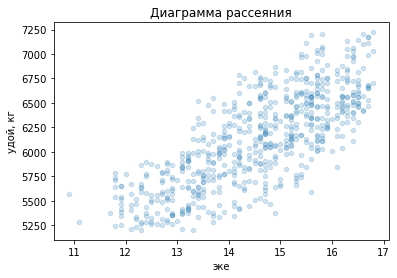

In [203]:
scar_plot(df1,'удой, кг', 'эке' )

Коэффициент корреляции Спирмена:  0.43754251989802084
P-value:  9.395930002891475e-31

Корреляция является статистически значимой

Корреляция умеренная


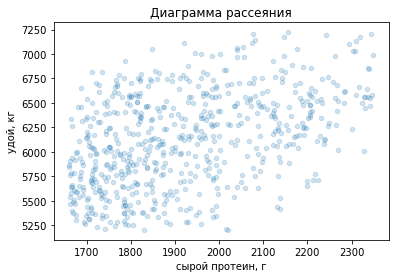

In [204]:
scar_plot(df1,'удой, кг', 'сырой протеин, г' )

Коэффициент корреляции Спирмена:  0.787904090851949
P-value:  6.236376891916343e-134

Корреляция является статистически значимой

Корреляция высокая


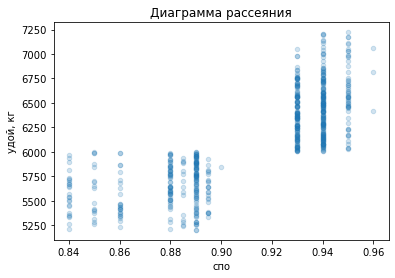

In [205]:
scar_plot(df1,'удой, кг', 'спо')

Коэффициент корреляции Спирмена:  0.688505794761783
P-value:  2.1035311214189552e-89

Корреляция является статистически значимой

Корреляция заметная


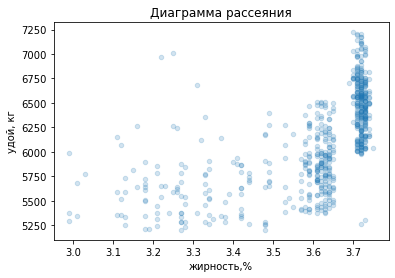

In [206]:
scar_plot(df1,'удой, кг', 'жирность,%')

Коэффициент корреляции Спирмена:  -0.005700881383962722
P-value:  0.886621725204249

Корреляция не является статистически значимой

Корреляция умеренная


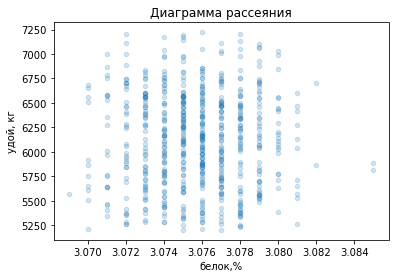

In [207]:
scar_plot(df1,'удой, кг', 'белок,%')

Целевой признак **удой, кг** имеет:
1. высокую корреляцию с "эке", "спо", "жирность,%";
2. умеренную корреляцию с "сырой протеин, г", "белок,%".

Корреляция статистически значима со следующеми признаками: "эке", "спо", "жирность,%", "сырой протеин, г".

**Категориальные признаки**
1. Целевой признак: удой, кг

2. Входные признаки:
* тип пастбища
* порода
* порода папы
* возраст

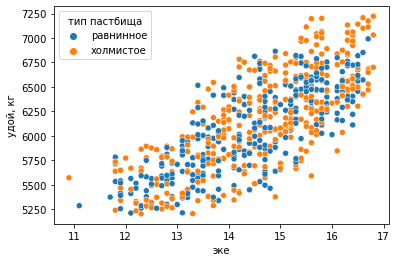

In [208]:
sns.scatterplot(data=df1, x='эке', y='удой, кг', hue='тип пастбища')
plt.show()

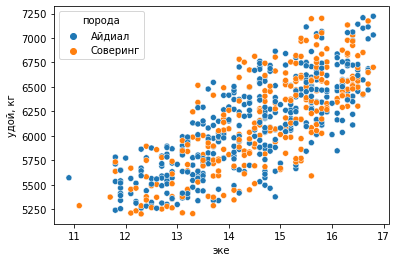

In [209]:
sns.scatterplot(data=df1, x='эке', y='удой, кг', hue='порода')
plt.show()

Корреляция слаба выражена.

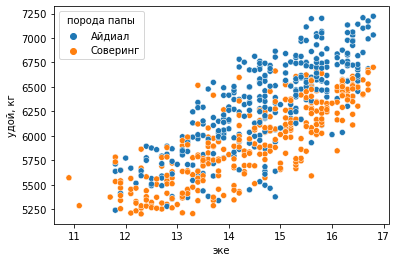

In [210]:
sns.scatterplot(data=df1, x='эке', y='удой, кг', hue='порода папы')
plt.show()

Корреляция умеренна выражена.

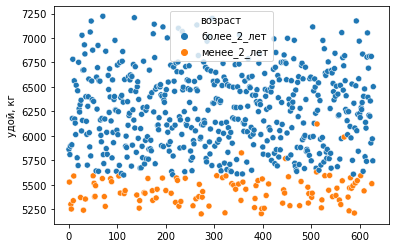

In [211]:
sns.scatterplot(data=df1, x=df1.index, y='удой, кг', hue='возраст')
plt.show()

Корреляция сильно выражена.

**Вывод**:
* Линейная связь наблюдается между "удой, кг" и "сырой протеин,г".
* Нелинейная связь наблюдается между "удой, кг" и "эке", "спо", "жирность,%", "белок,%".
* Высокая корреляция между "удой, кг" и "эке", "спо", "возраст".
* Умеренная корреляция наблюдается между "удой, кг" и "сырой протеин,г", "порода папы".
* Слабая корреляция между "удой, кг" и "жирность,%", "белок,%", "порода", "тип пастбища".

**Матрица диаграмм рассеяния**

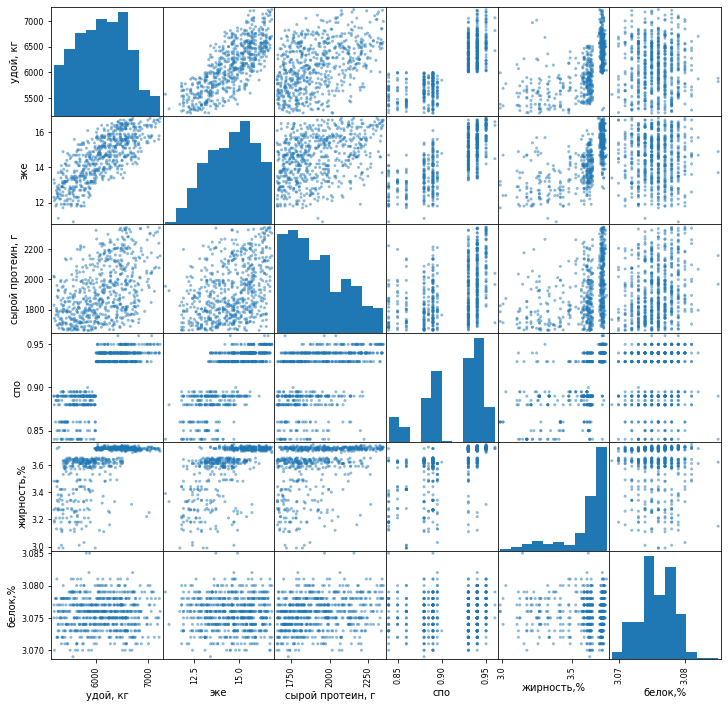

In [212]:
pd.plotting.scatter_matrix(df1.drop('id', axis=1), figsize=(12, 12))
plt.show()

<AxesSubplot:>

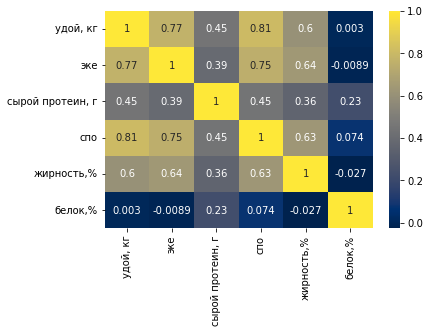

In [213]:
sns.heatmap(df1.drop('id', axis=1).corr(), annot=True, cmap='cividis')

**Вывод:** между признаками наблюдаются нелинейные связи. Возможно, это вследствие разного масштаба данных. 

## Обучение модели линейной регрессии

#### 1. Построим первую модель линейной регрессии

In [214]:
df1.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,0.890,Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Айдиал,равнинное,Соверинг,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,Соверинг,холмистое,Соверинг,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,Соверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Айдиал,равнинное,Соверинг,3.73,3.073,вкусно,менее_2_лет


In [215]:
X = df1[['эке', 'сырой протеин, г', 'спо', 'порода', 'тип пастбища', 'возраст', 'порода папы']]
y = df1['удой, кг']

Кодируем категориальные признаки с помощью OneHotEncoder

In [216]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 7)
(157, 7)
(471,)
(157,)


In [217]:
encoder = OneHotEncoder(drop='first', sparse=False)
cat_columns = ['порода', 'тип пастбища', 'возраст', 'порода папы']
X_train_ohe = encoder.fit_transform(X_train[cat_columns])
X_test_ohe = encoder.transform(X_test[cat_columns])

encoder_col_names = encoder.get_feature_names()
encoder_col_names

C:\Users\Пользователь\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_Соверинг', 'x1_холмистое', 'x2_менее_2_лет', 'x3_Соверинг'],
      dtype=object)

In [218]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

Масштабируем количественные признаки с помощью StandardScaler

In [219]:
scaler = StandardScaler()
num_columns = ['эке', 'сырой протеин, г', 'спо']
X_train_scaled = scaler.fit_transform(X_train[num_columns])
X_test_scaled = scaler.transform(X_test[num_columns])

In [220]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_columns)

In [221]:
X_train = pd.concat((X_train_ohe, X_train_scaled), axis=1)
X_test = pd.concat((X_test_ohe, X_test_scaled), axis=1)

Построим модель линейной регрессии

In [222]:
model_lr_1 = LinearRegression()
model_lr_1.fit(X_train, y_train)
predictions_1 = model_lr_1.predict(X_test)

In [223]:
r2_1 = r2_score(y_test, predictions_1)
print("R2 LinearRegression =", r2_1)

R2 LinearRegression = 0.7844078173416966


Text(0.5, 1.0, 'Анализ дисперсии')

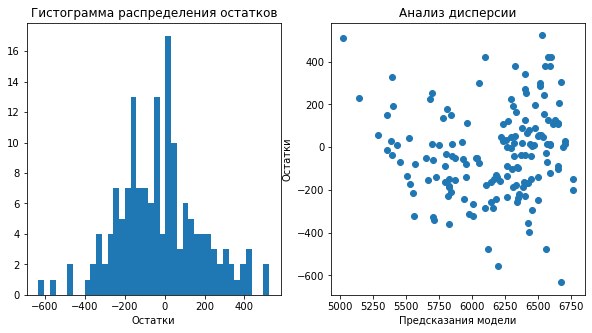

In [224]:
#анализ остатков
residuals = y_test - predictions_1

#графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=40)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_1, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')

**Вывод:** коэффициент детерминации равен 78.4%. Остатки имеют нормальное распределение с выбросами.

#### 2. Построим вторую модель линейной регрессии

In [225]:
df1.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,0.890,Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Айдиал,равнинное,Соверинг,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,Соверинг,холмистое,Соверинг,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,Соверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Айдиал,равнинное,Соверинг,3.73,3.073,вкусно,менее_2_лет


In [226]:
df1_copy = df1
df1_copy['эке_2'] = df1['эке'] ** 2

In [227]:
df1_copy.head(10)

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы,"жирность,%","белок,%",вкус молока,возраст,эке_2
0,1,5863,14.2,1743,0.890,Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64
1,2,5529,12.8,2138,0.890,Айдиал,равнинное,Соверинг,3.54,3.079,вкусно,менее_2_лет,163.84
2,3,5810,14.0,1854,0.885,Соверинг,холмистое,Соверинг,3.59,3.074,не вкусно,более_2_лет,196.00
3,4,5895,12.4,2012,0.885,Соверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76
4,5,5302,12.8,1675,0.885,Айдиал,равнинное,Соверинг,3.73,3.073,вкусно,менее_2_лет,163.84
5,6,5254,12.7,1806,0.885,Соверинг,холмистое,Соверинг,3.13,3.078,вкусно,менее_2_лет,161.29
6,7,5910,13.2,1792,0.885,Айдиал,равнинное,Соверинг,3.48,3.077,вкусно,более_2_лет,174.24
7,8,6179,14.7,1806,0.930,Айдиал,равнинное,Айдиал,3.55,3.076,вкусно,более_2_лет,216.09
8,9,6783,14.2,1918,0.940,Соверинг,холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет,201.64
9,10,5339,13.4,1791,0.895,Айдиал,холмистое,Соверинг,3.13,3.075,вкусно,менее_2_лет,179.56


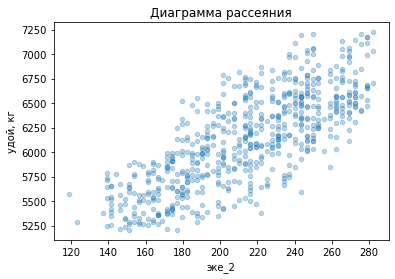

In [228]:
df1_copy.plot(kind='scatter', x='эке_2', y='удой, кг', alpha=0.3, title='Диаграмма рассеяния')
plt.show()

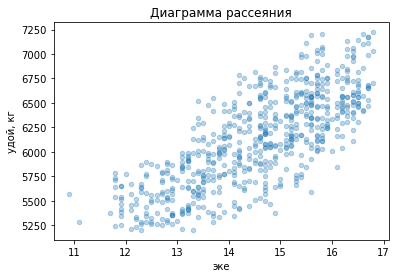

In [229]:
df1.plot(kind='scatter', x='эке', y='удой, кг', alpha=0.3, title='Диаграмма рассеяния')
plt.show()

In [230]:
X = df1_copy[['эке_2', 'сырой протеин, г', 'спо', 'порода', 'тип пастбища', 'возраст', 'порода папы']]
y = df1_copy['удой, кг']

In [231]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 7)
(157, 7)
(471,)
(157,)


Кодируем категориальные признаки с помощью OneHotEncoder

In [232]:
encoder = OneHotEncoder(drop='first', sparse=False)
cat_columns = ['спо', 'порода', 'тип пастбища', 'возраст', 'порода папы']
X_train_ohe = encoder.fit_transform(X_train[cat_columns])
X_test_ohe = encoder.transform(X_test[cat_columns])

encoder_col_names = encoder.get_feature_names()
encoder_col_names

C:\Users\Пользователь\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_0.85', 'x0_0.86', 'x0_0.88', 'x0_0.885', 'x0_0.89', 'x0_0.895',
       'x0_0.9', 'x0_0.93', 'x0_0.94', 'x0_0.95', 'x0_0.96',
       'x1_Соверинг', 'x2_холмистое', 'x3_менее_2_лет', 'x4_Соверинг'],
      dtype=object)

In [233]:
df1_copy['спо'].unique()

array([0.89 , 0.885, 0.93 , 0.94 , 0.895, 0.95 , 0.96 , 0.85 , 0.84 ,
       0.86 , 0.88 , 0.9  ])

In [234]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

Масштабируем количественные признаки с помощью StandardScaler

In [235]:
scaler = StandardScaler()
num_columns = ['эке_2', 'сырой протеин, г']
X_train_scaled = scaler.fit_transform(X_train[num_columns])
X_test_scaled = scaler.transform(X_test[num_columns])

In [236]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_columns)

In [237]:
X_train = pd.concat((X_train_ohe, X_train_scaled), axis=1)
X_test = pd.concat((X_test_ohe, X_test_scaled), axis=1)

Построим модель линейной регрессии

In [238]:
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train, y_train)
predictions_2 = model_lr_2.predict(X_test)

In [239]:
r2_2 = r2_score(y_test, predictions_2)
print("R2 LinearRegression =", r2_2)

R2 LinearRegression = 0.8154829641817346


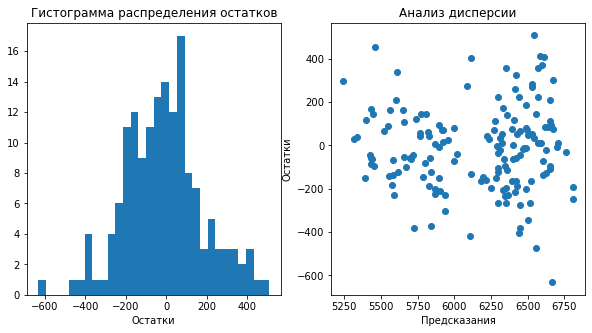

In [240]:
residuals_2 = y_test - predictions_2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_2, bins=30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_2, y=residuals_2)
axes[1].set_title('Анализ дисперсии')
axes[1].set_xlabel('Предсказания')
axes[1].set_ylabel('Остатки')
plt.show()

**Вывод:** коэффициент детерминации равен 81.5%. Остатки имеют ассимиричное нормальное распределение со смещением влево: модель часто даёт слишком большие предсказания, её прогнозы больше истинных значений. Вторая модель показала себя лучше, чем первая. Устранение нелинейности повлияло в лучшую сторону.

#### 3. Построим третью модель линейной регрессии

In [241]:
df_dad = df1_copy.merge(df2, on='id', how='left')
df_dad.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы,"жирность,%","белок,%",вкус молока,возраст,эке_2,имя папы
0,1,5863,14.2,1743,0.890,Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,Буйный
1,2,5529,12.8,2138,0.890,Айдиал,равнинное,Соверинг,3.54,3.079,вкусно,менее_2_лет,163.84,Соловчик
2,3,5810,14.0,1854,0.885,Соверинг,холмистое,Соверинг,3.59,3.074,не вкусно,более_2_лет,196.00,Барин
3,4,5895,12.4,2012,0.885,Соверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,Буйный
4,5,5302,12.8,1675,0.885,Айдиал,равнинное,Соверинг,3.73,3.073,вкусно,менее_2_лет,163.84,Барин


In [242]:
df_dad['спо'] = df_dad['спо'].apply(lambda x: 'менее_0.90' if x < 0.90 else 'более_0.90')

In [243]:
X = df_dad[['сырой протеин, г','спо', 'порода','тип пастбища','порода папы','возраст','эке_2', 'имя папы']]
y = df_dad['удой, кг']

In [244]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 8)
(157, 8)
(471,)
(157,)


Нормализуем категориальные признаки с помощью метода One-Hot Encoding

In [245]:
encoder = OneHotEncoder(drop='first', sparse=False)
cat_columns = ['спо', 'порода', 'тип пастбища', 'возраст', 'порода папы', 'имя папы']
X_train_ohe = encoder.fit_transform(X_train[cat_columns])
X_test_ohe = encoder.transform(X_test[cat_columns])

encoder_col_names = encoder.get_feature_names()
encoder_col_names

C:\Users\Пользователь\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_менее_0.90', 'x1_Соверинг', 'x2_холмистое', 'x3_менее_2_лет',
       'x4_Соверинг', 'x5_Буйный', 'x5_Геркулес', 'x5_Соловчик'],
      dtype=object)

In [246]:
'''columns = ['спо_менее_0.92',
                       'порода_Соверинг',
                       'тип пастбища_холмистое',
                       'возраст_менее_2_лет',
                       'порода папы_Соверинг',
                       'имя папы_Буйный',
                       'имя папы_Геркулес',
                       'имя папы_Соловчик',
                       'эке_2',
                       'сырой протеин(г)'] '''

"columns = ['спо_менее_0.92',\n                       'порода_Соверинг',\n                       'тип пастбища_холмистое',\n                       'возраст_менее_2_лет',\n                       'порода папы_Соверинг',\n                       'имя папы_Буйный',\n                       'имя папы_Геркулес',\n                       'имя папы_Соловчик',\n                       'эке_2',\n                       'сырой протеин(г)'] "

In [247]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

Масштабируем количественные признаки с помощью StandardScaler

In [248]:
scaler = StandardScaler()
num_columns = ['эке_2', 'сырой протеин, г']
X_train_scaled = scaler.fit_transform(X_train[num_columns])
X_test_scaled = scaler.transform(X_test[num_columns])

In [249]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_columns)

In [250]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [251]:
print(X_train.shape)
X_train.head(15)

(471, 10)


,x0_менее_0.90,x1_Соверинг,x2_холмистое,x3_менее_2_лет,x4_Соверинг,x5_Буйный,x5_Геркулес,x5_Соловчик,эке_2,"сырой протеин, г"
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.577968,1.079523
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.511438,-0.196920
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.082269,-1.386085
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.150235,0.752230
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.102358,0.828598
5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.004235,-0.955149
6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.403256,-0.273289
7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.754809,0.364933
8,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.754809,1.537733
9,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.746810,0.332204


In [252]:
X_train.columns = ['спо_менее_0.90',
                       'порода_Соверинг',
                       'тип пастбища_холмистое',
                       'возраст_менее_2_лет',
                       'порода папы_Соверинг',
                       'имя папы_Буйный',
                       'имя папы_Геркулес',
                       'имя папы_Соловчик',
                       'эке_2',
                       'сырой протеин(г)']

X_train.head()

,спо_менее_0.90,порода_Соверинг,тип пастбища_холмистое,возраст_менее_2_лет,порода папы_Соверинг,имя папы_Буйный,имя папы_Геркулес,имя папы_Соловчик,эке_2,сырой протеин(г)
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.577968,1.079523
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.511438,-0.196920
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.082269,-1.386085
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.150235,0.752230
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.102358,0.828598


In [253]:
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train, y_train)
predictions_3 = model_lr_3.predict(X_test)

C:\Users\Пользователь\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- x0_менее_0.90
- x1_Соверинг
- x2_холмистое
- x3_менее_2_лет
- x4_Соверинг
- ...
Feature names seen at fit time, yet now missing:
- возраст_менее_2_лет
- имя папы_Буйный
- имя папы_Геркулес
- имя папы_Соловчик
- порода папы_Соверинг
- ...

  warnings.warn(message, FutureWarning)


In [254]:
r2_lr_3 = r2_score(y_test, predictions_3)
print("R2 LinearRegression =", r2_lr_3)

R2 LinearRegression = 0.8245196485602115


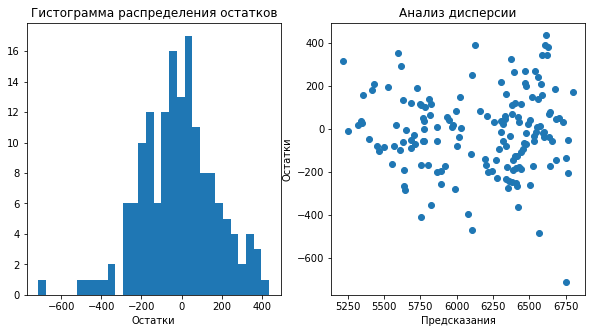

In [255]:
residuals_3 = y_test - predictions_3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_3, bins=30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_3, y=residuals_3)
axes[1].set_title('Анализ дисперсии')
axes[1].set_xlabel('Предсказания')
axes[1].set_ylabel('Остатки')
plt.show()

**Вывод:** коэффициент детерминации равен 82.5%. Остатки имеют ассиметричное нормальное распределение с выбросами. Наибольшее значение из рассматриваемых моделей.

**Сравнение трех моделей** 

* Коэффициент детерминации:

1. первая модель: R2 = 0.784;
2. вторая модель: R2 = 0.815;
3. третья модель: R2 = 0.825.

**Расчет точности каждой модели по трем метрикам: MSE, MAE, RMSE**

Первая модель:

In [256]:
mse_1 = mean_squared_error(y_test, predictions_1)
rmse_1 = mean_squared_error(y_test, predictions_1, squared=False)
mae_1 = mean_absolute_error(y_test, predictions_1)
print('First model MSE = ', mse_1)
print('First model RMSE = ', rmse_1)
print('First model MAE = ', mae_1)

First model MSE =  43887.015009660536
First model RMSE =  209.49227911706086
First model MAE =  164.24194463474933


Вторая модель:

In [257]:
mse_2 = mean_squared_error(y_test, predictions_2)
rmse_2 = mean_squared_error(y_test, predictions_2, squared=False)
mae_2 = mean_absolute_error(y_test, predictions_2)
print('Second model MSE = ', mse_2)
print('Second model RMSE = ', rmse_2)
print('Second model MAE = ', mae_2)

Second model MSE =  37561.20384628612
Second model RMSE =  193.807130535195
Second model MAE =  151.35068076810148


Третья модель: 

In [258]:
mse_3 = mean_squared_error(y_test, predictions_3)
rmse_3 = mean_squared_error(y_test, predictions_3, squared=False)
mae_3 = mean_absolute_error(y_test, predictions_3)
print('Third model MSE = ', mse_3)
print('Third model RMSE = ', rmse_3)
print('Third model MAE = ', mae_3)

Third model MSE =  35721.65151156927
Third model RMSE =  189.00172356772111
Third model MAE =  146.27150820234186


Третья модель имеет лучший показатель по точности и наименьшие показатели ошибок из всех моделей. Поэтому она будет самой точной. Определим доверительный интревал прогноза для этой модели.

In [259]:
# Рассчитываем ошибки модели
errors =  np.array(predictions_3) - np.array(y_test)

# Находим квантили ошибок
alpha = 0.05  # Уровень доверия 95%
lower_quantile = np.quantile(errors, alpha / 2)
upper_quantile = np.quantile(errors, 1 - alpha / 2)

# Доверительный интервал прогноза
mean_prediction = np.mean(predictions_3)
lower_bound = mean_prediction + lower_quantile
upper_bound = mean_prediction + upper_quantile

# Вывод результата
print(f'Доверительный интервал прогноза: [{lower_bound}, {upper_bound}]')

Доверительный интервал прогноза: [5797.762075323825, 6551.637259936415]


Спрогнозируем удой коров, которых фермер хочет купить

In [260]:
eke = df1['эке'].mean()
spo = df1['спо'].mean()
sp = df1['сырой протеин, г'].mean()
df3['эке'] = eke * 1.05
df3['сырой_протеин, г'] = sp * 1.05
df3['спо'] = spo * 1.05

In [261]:
df3_copy = df3

In [262]:
df3_copy['эке_2'] = df3_copy['эке'] ** 2 

In [263]:
df3_copy['спо'] = df3['спо'].apply(lambda x: 'менее_0.90' if x < 0.90 else 'более_0.90')

In [264]:
print(df3_copy.shape)
df3_copy.head(15)

(20, 11)


,порода,тип пастбища,порода папы,имя папы,"текущая жирность,%","текущий уровень белка,%",возраст,эке,"сырой_протеин, г",спо,эке_2
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,более_0.90,233.361138
1,Айдиал,равнинное,Соверинг,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,более_0.90,233.361138
2,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,более_0.90,233.361138
3,Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,более_0.90,233.361138
4,Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,более_0.90,233.361138
5,Соверинг,равнинное,Соверинг,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,более_0.90,233.361138
6,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,более_0.90,233.361138
7,Айдиал,равнинное,Соверинг,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,более_0.90,233.361138
8,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,более_0.90,233.361138
9,Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,более_0.90,233.361138


Нормализация категориальных признаков для прогноза

In [265]:
encoder = OneHotEncoder(drop='first', sparse=False)
cat_col_names = ['спо', 'порода', 'тип пастбища', 'возраст', 'порода папы', 'имя папы']
cow_buy_ohe = encoder.fit_transform(df3_copy[cat_col_names])
encoder_col_names = encoder.get_feature_names()

cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)

C:\Users\Пользователь\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Масштабирование количественных признаков

In [266]:
scaler = StandardScaler()
num_col_names = ['эке_2', 'сырой_протеин, г']
cow_buy_scaled = scaler.fit_transform(df3_copy[num_col_names])

cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

In [267]:
df_new = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)
df_new.insert(loc=0,
                   column='x0_менее_0.90',
                   value = 0.0)

In [268]:
print(df_new.shape)
df_new.head(10)

(20, 10)


,x0_менее_0.90,x1_Соверинг,x2_холмистое,x3_менее_2_лет,x4_Соверинг,x5_Буйный,x5_Геркулес,x5_Соловчик,эке_2,"сырой_протеин, г"
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-2.842171e-14,4.547474e-13
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,-2.842171e-14,4.547474e-13
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-2.842171e-14,4.547474e-13
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-2.842171e-14,4.547474e-13
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.842171e-14,4.547474e-13
5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,-2.842171e-14,4.547474e-13
6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-2.842171e-14,4.547474e-13
7,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-2.842171e-14,4.547474e-13
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-2.842171e-14,4.547474e-13
9,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,-2.842171e-14,4.547474e-13


In [269]:
df_new.columns = ['спо_менее_0.90',
                       'порода_Соверинг',
                       'тип пастбища_холмистое',
                       'возраст_менее_2_лет',
                       'порода папы_Соверинг',
                       'имя папы_Буйный',
                       'имя папы_Геркулес',
                       'имя папы_Соловчик',
                       'эке_2',
                       'сырой протеин(г)']

df3['удой(кг)'] = model_lr_3.predict(df_new)
df3.head(15)

,порода,тип пастбища,порода папы,имя папы,"текущая жирность,%","текущий уровень белка,%",возраст,эке,"сырой_протеин, г",спо,эке_2,удой(кг)
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6495.147652
1,Айдиал,равнинное,Соверинг,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,более_0.90,233.361138,6262.177150
2,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6164.676484
3,Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6479.139776
4,Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6426.315579
5,Соверинг,равнинное,Соверинг,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,более_0.90,233.361138,6311.432412
6,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6495.147652
7,Айдиал,равнинное,Соверинг,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6452.804791
8,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6164.676484
9,Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,более_0.90,233.361138,6288.512134


Таким образом, был спрогнозирован годовой удой продаваемых коров, который находится в диапазоне от 6010 до 6502. Прогноз входит в ранее рассчитанный нами доверительный интервал.

## Обучение модели логистической регрессии

Далее нужно спрогнозировать вкус молока. Для этой цели воспользуемся логистической регрессией.

In [270]:
df3.head(15)

,порода,тип пастбища,порода папы,имя папы,"текущая жирность,%","текущий уровень белка,%",возраст,эке,"сырой_протеин, г",спо,эке_2,удой(кг)
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6495.147652
1,Айдиал,равнинное,Соверинг,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,более_0.90,233.361138,6262.177150
2,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6164.676484
3,Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6479.139776
4,Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6426.315579
5,Соверинг,равнинное,Соверинг,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,более_0.90,233.361138,6311.432412
6,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6495.147652
7,Айдиал,равнинное,Соверинг,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6452.804791
8,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6164.676484
9,Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,более_0.90,233.361138,6288.512134


In [271]:
X = df_dad[['порода', 
              'тип пастбища', 
              'жирность,%',
              'белок,%',
              'возраст',
              'сырой протеин, г',
              'спо',
              'эке_2']]

y = df_dad['вкус молока']

In [272]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
y_train = y_train.map({'вкусно': 0, 'не вкусно': 1}).astype(int)
y_test = y_test.map({'вкусно': 0, 'не вкусно': 1}).astype(int)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(471, 8)
(157, 8)
(471,)
(157,)


In [273]:
encoder = OneHotEncoder(drop='first', sparse=False)
cat_col_names = ['спо', 'тип пастбища', 'возраст']
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

C:\Users\Пользователь\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [274]:
scaler = StandardScaler()
num_col_names = ['эке_2', 'сырой протеин, г', 'жирность,%', 'белок,%']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [275]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [276]:
X_train.head(15)

,x0_менее_0.90,x1_холмистое,x2_менее_2_лет,эке_2,"сырой протеин, г","жирность,%","белок,%"
0,0.0,1.0,0.0,1.577968,1.079523,0.562532,-0.679069
1,1.0,1.0,1.0,-1.511438,-0.196920,-1.601817,-1.452568
2,1.0,0.0,0.0,0.082269,-1.386085,-2.563750,1.254677
3,0.0,1.0,0.0,-0.150235,0.752230,0.081565,1.254677
4,1.0,0.0,0.0,-1.102358,0.828598,0.201807,0.094429
5,0.0,1.0,0.0,0.004235,-0.955149,-0.098797,-0.292320
6,0.0,1.0,0.0,1.403256,-0.273289,0.682773,1.254677
7,0.0,1.0,0.0,1.754809,0.364933,0.682773,-0.679069
8,0.0,1.0,0.0,1.754809,1.537733,0.682773,-2.226067
9,1.0,1.0,0.0,-0.746810,0.332204,0.021444,2.028176


In [277]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [278]:
for feature_number, feature_name in enumerate(X_train.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.2f}")

x0_менее_0.90       : +0.48
x1_холмистое        : +0.59
x2_менее_2_лет      : +1.28
эке_2               : +0.54
сырой протеин, г    : +0.87
жирность,%          : +1.03
белок,%             : +0.77


In [279]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Модель логистической регрессии Accuracy = ', round(accuracy, 3))
print('Модель логистической регрессии Precision = ', round(precision, 3))
print('Модель логистической регрессии Recall = ', round(recall, 3))

Модель логистической регрессии Accuracy =  0.637
Модель логистической регрессии Precision =  0.667
Модель логистической регрессии Recall =  0.348


Таким образом, модель спрогнозировала правильно ответ в 63,7% случаев.

Построим матрицу ошибок

Text(0.5, 15.0, 'Predicted')

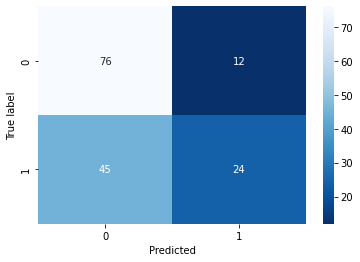

In [280]:
m = confusion_matrix(y_test, y_pred)
sns.heatmap(m, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

Из матрицы видно следующее:
* модель правильно предсказывает в 101 случаях.
* модель ложно классифицирует "не вкусное", как "вкусное" в 45 случаях.
* модель ложно классифицирует "вкусное", как "не вкусное" в 12 случаях.

Главное для заказчика — вкусное молоко. Значит, нужно свести к минимуму ошибку, когда наша модель предсказывает "вкусное" молоко, когда в действительности это не так. То есть нужно минимизировать ошибку второго рода. Нужно акцентировать внимание на recall, чтобы ее значение стремилось к 1.

In [281]:
thresholds = [round(i,2) for i in np.linspace(0,1,num = 4,endpoint=False)]
thresholds

[0.0, 0.25, 0.5, 0.75]

In [282]:
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
data.head()

,y_valid,y_proba,y_pred_0.0,y_pred_0.25,y_pred_0.5,y_pred_0.75
0,0,0.323738,1,1,0,0
1,0,0.257809,1,1,0,0
2,0,0.375675,1,1,0,0
3,1,0.573309,1,1,1,0
4,0,0.210207,1,0,0,0


In [283]:
print('y_pred_0.0 Recall = ', recall_score(y_test, data['y_pred_0.0']))
print('y_pred_0.25 Recall = ', recall_score(data['y_valid'], data['y_pred_0.25']))
print('y_pred_0.5 Recall = ', recall_score(data['y_valid'], data['y_pred_0.5']))
print('y_pred_0.75 Recall = ', recall_score(data['y_valid'], data['y_pred_0.75']))

y_pred_0.0 Recall =  1.0
y_pred_0.25 Recall =  0.9565217391304348
y_pred_0.5 Recall =  0.34782608695652173
y_pred_0.75 Recall =  0.014492753623188406


In [284]:
thresholds = [round(i,2) for i in np.linspace(0.2,0.4,num = 4,endpoint=False)]
thresholds

[0.2, 0.25, 0.3, 0.35]

In [285]:
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
data.head()

,y_valid,y_proba,y_pred_0.2,y_pred_0.25,y_pred_0.3,y_pred_0.35
0,0,0.323738,1,1,1,0
1,0,0.257809,1,1,0,0
2,0,0.375675,1,1,1,1
3,1,0.573309,1,1,1,1
4,0,0.210207,1,0,0,0


In [286]:
print('y_pred_0.2 Recall = ', recall_score(y_test, data['y_pred_0.2']))
print('y_pred_0.25 Recall = ', recall_score(data['y_valid'], data['y_pred_0.25']))
print('y_pred_0.3 Recall = ', recall_score(data['y_valid'], data['y_pred_0.3']))
print('y_pred_0.35 Recall = ', recall_score(data['y_valid'], data['y_pred_0.35']))

y_pred_0.2 Recall =  1.0
y_pred_0.25 Recall =  0.9565217391304348
y_pred_0.3 Recall =  0.8985507246376812
y_pred_0.35 Recall =  0.782608695652174


При пороге 0.2 мы получили нулевую ошибку второго рода.

In [287]:
y_pred_new = (clf.predict_proba(X_test)[:, 1] >= 0.2).astype(int) 
accuracy = accuracy_score(y_test, y_pred_new)
precision = precision_score(y_test, y_pred_new)
recall = recall_score(y_test, y_pred_new)
print('Модель логистической регрессии Accuracy = ', round(accuracy, 2))
print('Модель логистической регрессии Precision = ', round(precision, 2))
print('Модель логистической регрессии Recall = ', round(recall, 2))

Модель логистической регрессии Accuracy =  0.48
Модель логистической регрессии Precision =  0.46
Модель логистической регрессии Recall =  1.0


Text(0.5, 15.0, 'Predicted')

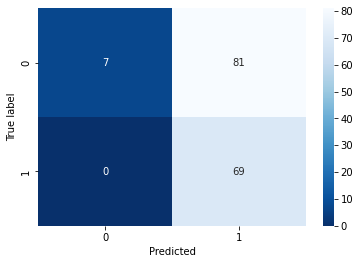

In [288]:
m = confusion_matrix(y_test, y_pred_new)
sns.heatmap(m, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

При минимизации оценки recall общая точность модели упала

Приступим к построению модели для датасета cow_buy.csv

In [289]:
df3.head(15)

,порода,тип пастбища,порода папы,имя папы,"текущая жирность,%","текущий уровень белка,%",возраст,эке,"сырой_протеин, г",спо,эке_2,удой(кг)
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6495.147652
1,Айдиал,равнинное,Соверинг,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,более_0.90,233.361138,6262.177150
2,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6164.676484
3,Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6479.139776
4,Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6426.315579
5,Соверинг,равнинное,Соверинг,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,более_0.90,233.361138,6311.432412
6,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6495.147652
7,Айдиал,равнинное,Соверинг,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6452.804791
8,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6164.676484
9,Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,более_0.90,233.361138,6288.512134


In [290]:
encoder = OneHotEncoder(drop='first', sparse=False)
cat_col_names = ['спо', 'тип пастбища', 'возраст']
cow_buy_hot = encoder.fit_transform(df3[cat_col_names])
encoder_cal_names = encoder.get_feature_names()
cow_buy_hot = pd.DataFrame(cow_buy_hot, columns=encoder_cal_names)

scaler = StandardScaler()
num_col_names = ['эке_2', 'сырой_протеин, г', 'текущая жирность,%', 'текущий уровень белка,%']
cow_buy_scaled = scaler.fit_transform(df3[num_col_names])

cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

cow_new = pd.concat([cow_buy_hot, cow_buy_scaled], axis=1)

C:\Users\Пользователь\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [291]:
cow_new.head(15)

,x1_холмистое,x2_менее_2_лет,эке_2,"сырой_протеин, г","текущая жирность,%","текущий уровень белка,%"
0,1.0,0.0,-2.842171e-14,4.547474e-13,0.020225,0.645020
1,0.0,1.0,-2.842171e-14,4.547474e-13,-0.303380,1.141190
2,0.0,0.0,-2.842171e-14,4.547474e-13,0.101127,0.446553
3,1.0,0.0,-2.842171e-14,4.547474e-13,-1.436000,-0.843488
4,0.0,0.0,-2.842171e-14,4.547474e-13,0.505634,0.446553
5,0.0,1.0,-2.842171e-14,4.547474e-13,0.424732,-1.637359
6,1.0,0.0,-2.842171e-14,4.547474e-13,0.020225,0.645020
7,0.0,0.0,-2.842171e-14,4.547474e-13,-0.060676,0.942722
8,0.0,0.0,-2.842171e-14,4.547474e-13,0.101127,0.446553
9,1.0,1.0,-2.842171e-14,4.547474e-13,-1.436000,0.942722


In [292]:
cow_new.insert(loc=0,
               column='x0_менее_0.90',
               value = 0.0)
cow_new.columns = ['спо_менее_0.90',
                       'тип пастбища_холмистое',
                       'возраст_менее_2_лет',
                       'эке_2',
                       'сырой протеин,г',
                       'жирность,%',
                       'белок,%']

In [293]:
taste_pred = (clf.predict_proba(cow_new)[:, 1] >= 0.2).astype(int)
taste_pred

C:\Users\Пользователь\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- возраст_менее_2_лет
- спо_менее_0.90
- сырой протеин,г
- тип пастбища_холмистое
Feature names seen at fit time, yet now missing:
- x0_менее_0.90
- x1_холмистое
- x2_менее_2_лет
- сырой протеин, г

  warnings.warn(message, FutureWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

По нашему прогнозу все коровы дадут невкусное молоко

Попробуем увеличить порог

In [294]:
taste_pred = (clf.predict_proba(cow_new)[:, 1] >= 0.25).astype(int)
taste_pred

C:\Users\Пользователь\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- возраст_менее_2_лет
- спо_менее_0.90
- сырой протеин,г
- тип пастбища_холмистое
Feature names seen at fit time, yet now missing:
- x0_менее_0.90
- x1_холмистое
- x2_менее_2_лет
- сырой протеин, г

  warnings.warn(message, FutureWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [303]:
taste_pred = (clf.predict_proba(cow_new)[:, 1] >= 0.35).astype(int)
taste_pred

C:\Users\Пользователь\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- возраст_менее_2_лет
- спо_менее_0.90
- сырой протеин,г
- тип пастбища_холмистое
Feature names seen at fit time, yet now missing:
- x0_менее_0.90
- x1_холмистое
- x2_менее_2_лет
- сырой протеин, г

  warnings.warn(message, FutureWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [308]:
taste_pred = (clf.predict_proba(cow_new)[:, 1] >= 0.38).astype(int)
taste_pred

C:\Users\Пользователь\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- возраст_менее_2_лет
- спо_менее_0.90
- сырой протеин,г
- тип пастбища_холмистое
Feature names seen at fit time, yet now missing:
- x0_менее_0.90
- x1_холмистое
- x2_менее_2_лет
- сырой протеин, г

  warnings.warn(message, FutureWarning)


array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [309]:
df3['вкус'] = taste_pred
df3['вкус'] = df3['вкус'].map({0: 'вкусно', 1: 'не вкусно'}).astype(str)

In [310]:
df3.head(15)

,порода,тип пастбища,порода папы,имя папы,"текущая жирность,%","текущий уровень белка,%",возраст,эке,"сырой_протеин, г",спо,эке_2,удой(кг),вкус
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6495.147652,вкусно
1,Айдиал,равнинное,Соверинг,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,более_0.90,233.361138,6262.177150,не вкусно
2,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6164.676484,не вкусно
3,Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6479.139776,не вкусно
4,Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6426.315579,не вкусно
5,Соверинг,равнинное,Соверинг,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,более_0.90,233.361138,6311.432412,не вкусно
6,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6495.147652,вкусно
7,Айдиал,равнинное,Соверинг,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6452.804791,не вкусно
8,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6164.676484,не вкусно
9,Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,более_0.90,233.361138,6288.512134,не вкусно


In [311]:
df3.loc[(df3['вкус'] == 'вкусно') & (df3['удой(кг)'] > 6000)]

,порода,тип пастбища,порода папы,имя папы,"текущая жирность,%","текущий уровень белка,%",возраст,эке,"сырой_протеин, г",спо,эке_2,удой(кг),вкус
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6495.147652,вкусно
6,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6495.147652,вкусно
16,Айдиал,холмистое,Соверинг,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6228.186624,вкусно


**Вывод:**  по нашим прогнозам фермеру следует купить три коровы.

## Итоговые выводы

В данной работе мы выполнили предобработку данных, провели исследовательский и корреляционный анализы данныхпостроили модели линейной и логистической регрессии. 
Для улучшения показателя модели линейной регрессии мы устранили нелинейность между признаками и добавили новый признак. Вот пример оценок наших моделей линейной регрессии: 

**Коэффициент детерминации:**
1. первая модель: R2 = 0.784;
2. вторая модель: R2 = 0.815;
3. третья модель: R2 = 0.825.

**Расчет точности каждой модели по трем метрикам: MSE, MAE, RMSE**

 Первая модель: 
* First model MSE =  43887.01500966053
* First model RMSE =  209.49227911706086
* First model MAE =  164.2419446347493

Вторая модель: 
* Second model MSE =  37561.203846286095
* Second model RMSE =  193.80713053519494
* Second model MAE =  151.35068076810157

Третья модель: 
* Third model MSE =  35721.65151156923
* Third model RMSE =  189.00172356772103
* Third model MAE =  146.2715082023418

Для построяния прогноза мы использовали третью модель. Доверительный интревал мы выбрали от 6010 до 6502.

Далее мы построили логистическую регрессию. 
Из матрицы ошибок мы получили следующее:

* модель правильно предсказывает в 101 случаях.
* модель ложно классифицирует "не вкусное", как "вкусное" в 45 случаях.
* модель ложно классифицирует "вкусное", как "не вкусное" в 12 случаях.

Главное для заказчика — вкусное молоко. Значит, нужно свести к минимуму ошибку, когда наша модель предсказывает "вкусное" молоко, когда в действительности это не так. То есть нужно минимизировать ошибку второго рода. Нужно акцентировать внимание на recall, чтобы ее значение стремилось к 1. Что мы, собственно, сделали. Вот новый результат:


* модель правильно предсказывает в 76 случаях.
* модель ложно классифицирует "не вкусное", как "вкусное" в 0 случаях.
* модель ложно классифицирует "вкусное", как "не вкусное" в 81 случаях.

Точность модели упала, зато теперь фермер точно не купит корову, дающее невкусное молоко.

Примеры нынешних метрик:
* Модель логистической регрессии Accuracy =  0.48
* Модель логистической регрессии Precision =  0.46
* Модель логистической регрессии Recall =  1.0

Среди 16 вариантов было выявлено 3, подходящих фермеру:

In [312]:
df3.loc[(df3['вкус'] == 'вкусно') & (df3['удой(кг)'] > 6000)]

,порода,тип пастбища,порода папы,имя папы,"текущая жирность,%","текущий уровень белка,%",возраст,эке,"сырой_протеин, г",спо,эке_2,удой(кг),вкус
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6495.147652,вкусно
6,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6495.147652,вкусно
16,Айдиал,холмистое,Соверинг,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,более_0.90,233.361138,6228.186624,вкусно


Данный результат не является идеальным, так как был выбран не оптимальный порог классификации - 0,40. На самом деле анализ показал, что для обнуления ошибки покупки коровы, дающей невкусное молоко, необходимо использовать порог классификации - 0,2. Но при таком пороге фермер оказывался без покупки.

Таким образом, минимальный риск покупки коров соответствует порогу классификации 0,2. Если фермер хочет купить "правильных" коров с минимальным риском, ему следует рассматривать большее количество кандидатов.